In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

In [5]:
model = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [2]:
laerning_rate = 0.001
dropout_rate = 0.5
N_EPOCHS = 50
N_BATCH = 20

### 모델 정의

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import add, Input,Dense,Activation, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model


# 입력과 출력의 Dimension이 같은 경우 사용합니다.
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    # 입력(x) : input_tensor와 F(x) : x를 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + x) 의 형태로 만들어보세요. 
    x = x + input_tensor
    x = Activation('relu')(x)
    return x


def residual_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1 , filters2 , filters3 = filters
    
    # 입력 Feature Map의 Size를 1/2로 줄이는 대신 Feature map의 Dimension을 2배로 늘려줍니다.
    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    # TODO : Projection Shortcut Connection을 구현해보세요.
    # 1 x 1 Convolution 연산을 수행하여 Dimension을 2배로 증가시키고
    # 입력 Feature map의 size를 1/2로 축소시켜보세요.
    shortcut = Conv2D(filters3, (1, 1), strides = strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # F(x) : x와 Shortcut Connection : shortcut을 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + shortcut) 의 형태로 만들어보세요.
    x = x + shortcut
    x = Activation('relu')(x)
    return x


def ResNet50():
    # 입력 이미지의 Shape을 정해줍니다.
    shape = (224,224,3)
    inputs = Input(shape)
    
    # 입력 영상의 크기를 줄이기 위한 Conv & Max-pooling
    x = ZeroPadding2D((3, 3))(inputs)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    # 첫 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])
    
    
    # 두 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    
    # 세 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    
    # 네 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # 마지막단에서 FC layer를 쓰지 않고 단순히 Averaging 합니다.
    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    # 1000개의 Class 구분
    x = Dense(24, activation='softmax')(x)
    
    # 모델 구성
    model = Model(inputs, x)
    return model

model = ResNet50()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [4]:
train_dir = '/content/drive/MyDrive/Mac/data/train'
validation_dir = '/content/drive/MyDrive/Mac/data/val'
test_dir = '/content/drive/MyDrive/Mac/data/test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ImageDateGenerator todtjd - 각 pixel 0 ~ 1 로 조정 (scaling)
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [6]:
# 이미지와 연결 -> generatot 생성

# Train Set
train_generator = train_datagen.flow_from_directory(
    train_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

# Validation Set
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

# Test Set
test_generator = test_datagen.flow_from_directory(
    test_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

Found 1720 images belonging to 24 classes.
Found 198 images belonging to 24 classes.
Found 219 images belonging to 24 classes.


In [7]:
# laber 의 클래스들을 확인
train_generator.class_indices
print(train_generator.class_indices)

# step 수 (에폭당 몇번 weight 업데이트 할 것인지)
len(train_generator), len(validation_generator), len(test_generator)
print(len(train_generator), len(validation_generator), len(test_generator))

# 배치 개수만큼 이미지 조회
batch = train_generator.next()

len(batch), type(batch)
print(len(batch))

type(batch[0]), batch[0].shape

{'개운죽': 0, '관음죽': 1, '괴마옥': 2, '극락조화': 3, '금전수': 4, '녹태고': 5, '다바나 고사리': 6, '더피 고사리': 7, '둥근 잎 아카시아': 8, '드라세나 드라코': 9, '드라세나 마지나타': 10, '디지고데카 아랄리아': 11, '떡갈잎 고무나무': 12, '라벤더': 13, '로즈마리': 14, '립살리스 트리고나': 15, '마란타 레우코네우라': 16, '마오리 소포라': 17, '마오리 코로키아': 18, '멕시코 소철': 19, '멜라니 고무나무': 20, '목마가렛': 21, '몬스테라 델리시오사': 22, '행운목': 23}
86 10 11
2


(numpy.ndarray, (20, 224, 224, 3))

In [ ]:
plt.figure(figsize = (20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(batch[0][i])
plt.show()

In [9]:
# 모델 컴파일
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
history = model.fit(train_generator,
                    epochs = 10,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator, # validation 데이터 사용
                    validation_steps = len(validation_generator),
                    verbose = 1
                    )

Epoch 1/10
86/86 [==============================] - 392s 5s/step - loss: 3.3589 - accuracy: 0.1465 - val_loss: 4.0250 - val_accuracy: 0.0455
Epoch 2/10
86/86 [==============================] - 46s 539ms/step - loss: 2.7623 - accuracy: 0.1901 - val_loss: 4.5036 - val_accuracy: 0.0505
Epoch 3/10
86/86 [==============================] - 46s 536ms/step - loss: 2.5510 - accuracy: 0.2593 - val_loss: 27.8366 - val_accuracy: 0.0404
Epoch 4/10
86/86 [==============================] - 46s 536ms/step - loss: 2.3229 - accuracy: 0.2884 - val_loss: 3.3209 - val_accuracy: 0.1061
Epoch 5/10
86/86 [==============================] - 46s 536ms/step - loss: 2.1368 - accuracy: 0.3488 - val_loss: 4.7978 - val_accuracy: 0.1414
Epoch 6/10
86/86 [==============================] - 46s 537ms/step - loss: 1.9753 - accuracy: 0.3983 - val_loss: 2.3779 - val_accuracy: 0.2626
Epoch 7/10
86/86 [==============================] - 46s 536ms/step - loss: 1.8677 - accuracy: 0.4233 - val_loss: 8.2259 - val_accuracy: 0.0808


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose = 0)
print(test_loss, test_accuracy)

### data agumentation 적용하기

In [24]:
train_gen_agu = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_gen = ImageDataGenerator(rescale = 1/255)

In [25]:
# Train Set
train_generator = train_gen_agu.flow_from_directory(
    train_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

# Validation Set
validation_generator = test_gen.flow_from_directory(
    validation_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

# Test Set
test_generator = test_gen.flow_from_directory(
    test_dir, # 이미지가 분류되어 있는 폴더
    target_size = (224, 224),
    class_mode = 'sparse',
    batch_size = N_BATCH
)

Found 1720 images belonging to 24 classes.
Found 198 images belonging to 24 classes.
Found 219 images belonging to 24 classes.


/content/drive/MyDrive/Mac/data/train/개운죽/arbor_0000.jpg


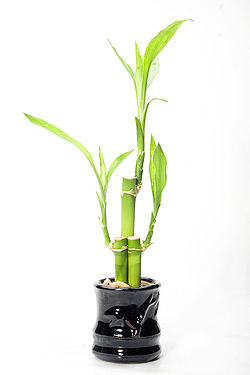

In [17]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = os.path.join(train_dir, '개운죽', 'arbor_0000.jpg')
print(image_path)

img = load_img(image_path)
img

In [18]:
x = img_to_array(img)
x = x[np.newaxis, ...]
x.shape

(1, 375, 250, 3)

In [26]:
train_gen2 = ImageDataGenerator(
    # rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

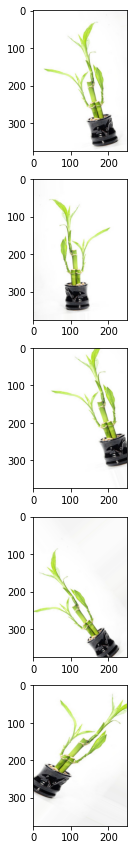

In [29]:
gen = train_gen2.flow(x, batch_size = 1)
plt.figure(figsize = (15, 15))
for i in range (5):
    plt.subplot(5, 1, i+1)
    batch = gen.next()
    img = batch[0].astype('uint8')
    plt.imshow(img)
plt.show()

In [ ]:
# 모델 컴파일
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

In [31]:
history = model.fit(train_generator,
                    epochs = 10,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator, # validation 데이터 사용
                    validation_steps = len(validation_generator),
                    verbose = 1
                    )

Epoch 1/10
86/86 [==============================] - 55s 552ms/step - loss: 2.4170 - accuracy: 0.2826 - val_loss: 18.1090 - val_accuracy: 0.1515
Epoch 2/10
86/86 [==============================] - 46s 533ms/step - loss: 2.1520 - accuracy: 0.3419 - val_loss: 1214.0408 - val_accuracy: 0.0404
Epoch 3/10
86/86 [==============================] - 46s 534ms/step - loss: 1.9325 - accuracy: 0.4221 - val_loss: 5.9474 - val_accuracy: 0.1818
Epoch 4/10
86/86 [==============================] - 46s 532ms/step - loss: 1.8760 - accuracy: 0.4157 - val_loss: 2.6296 - val_accuracy: 0.2828
Epoch 5/10
86/86 [==============================] - 46s 533ms/step - loss: 1.8125 - accuracy: 0.4552 - val_loss: 10.1571 - val_accuracy: 0.1313
Epoch 6/10
86/86 [==============================] - 46s 533ms/step - loss: 1.7271 - accuracy: 0.4686 - val_loss: 2.4704 - val_accuracy: 0.3434
Epoch 7/10
86/86 [==============================] - 47s 539ms/step - loss: 1.6408 - accuracy: 0.4640 - val_loss: 2.6928 - val_accuracy: 0

In [32]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose = 0)
print(test_loss, test_accuracy)

11/11 [==============================] - 47s 5s/step - loss: 4.4679 - accuracy: 0.2785
4.467868804931641 0.2785388231277466


### 예측 확인해보기

In [33]:
test_prediction = np.argmax(model.predict(test_generator), axis=-1)

In [ ]:
plt.figure(figsize = (15, 15))

start_index = 0
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = test_prediction[start_index + i]
    actual = test_generator[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(test_generator[start_index + i]))
plt.show()